In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams["figure.figsize"] = (10, 5)
import seaborn as sns
from urllib.parse import urlparse
from tld import get_tld
import re
from sklearn.model_selection import train_test_split
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score,log_loss,precision_score,recall_score,make_scorer,accuracy_score
import json
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
l = ['Extracted Features (Decision tree)', 'TF-IDF Embedding (Support Vector Machines Classifier)', 'Bag Of Words Embedding (Random Forest)']
train_acc = [94.1,98.4,99.0]
train_pre = [96.6,99.1,99.3]
train_rec = [95.8,98.0,99.4]
train_log = [2.01,0.52,0.99]
test_acc = [90.1,93.3,94.2]
test_pre = [93.5,97.3,97.2]
test_rec = [94.2,94.0,95.4]
test_log = [3.40,2.03,1.97]

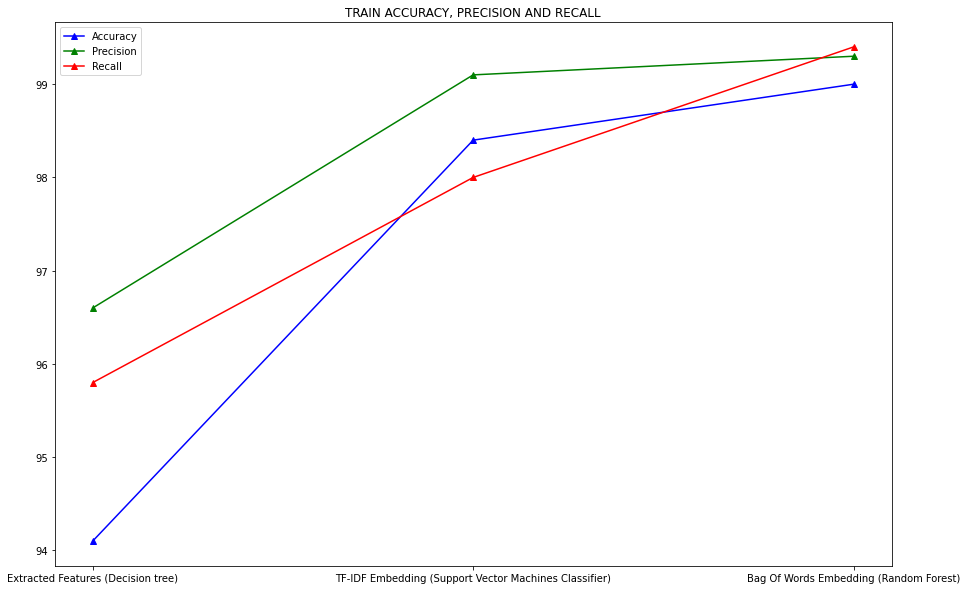

In [12]:
plt.figure(figsize = (15,10))
plt.title("TRAIN ACCURACY, PRECISION AND RECALL")
plt.plot(l,train_acc,  marker = "^", color = 'b', label = 'Accuracy')
plt.plot(l,train_pre, marker = "^", color = 'g', label = 'Precision')
plt.plot(l,train_rec, marker = "^", color = 'r', label = 'Recall')
plt.legend()
plt.show()

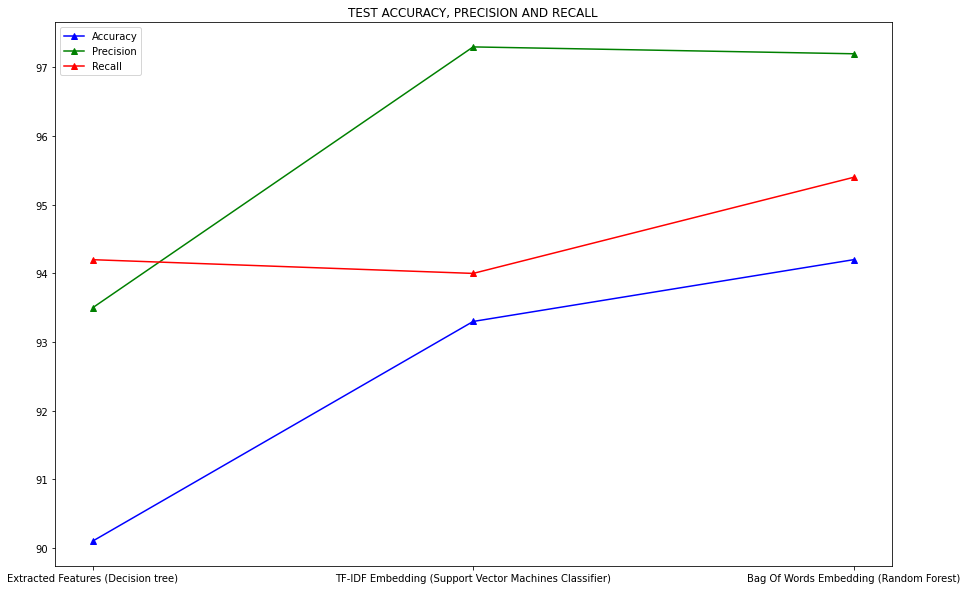

In [8]:
plt.figure(figsize = (15,10))
plt.title("TEST ACCURACY, PRECISION AND RECALL")
plt.plot(l,test_acc,  marker = "^", color = 'b', label = 'Accuracy')
plt.plot(l,test_pre, marker = "^", color = 'g', label = 'Precision')
plt.plot(l,test_rec, marker = "^", color = 'r', label = 'Recall')
plt.legend()
plt.show()

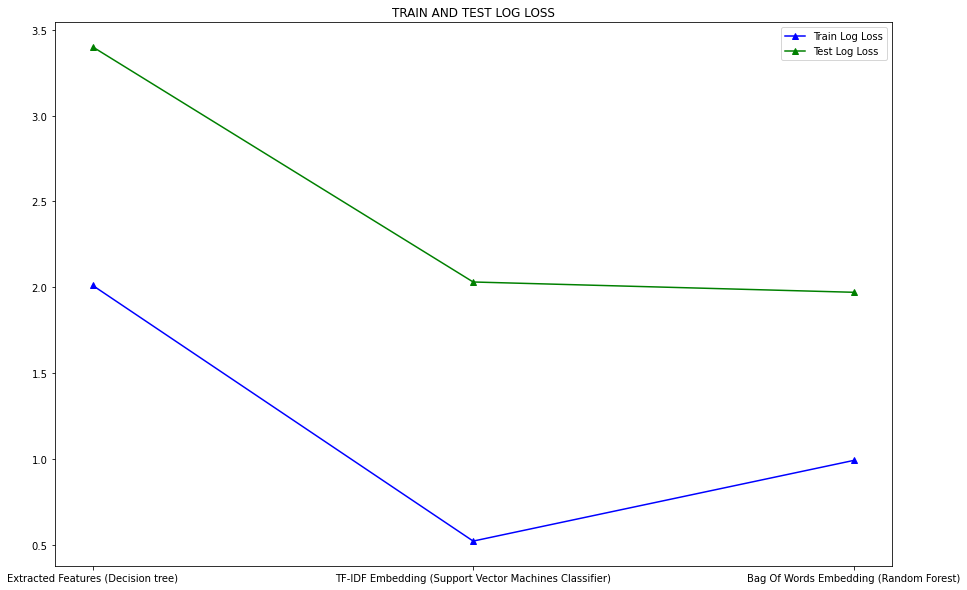

In [9]:
plt.figure(figsize = (15,10))
plt.title("TRAIN AND TEST LOG LOSS")
plt.plot(l,train_log,  marker = "^", color = 'b', label = 'Train Log Loss')
plt.plot(l,test_log, marker = "^", color = 'g', label = 'Test Log Loss')
plt.legend()
plt.show()

In [22]:
l = ['Extracted Features (Random Forest)', 'TF-IDF Embedding (Support Vector Machines Classifier)', 'Bag Of Words Embedding (Random Forest)']
train_acc = [90.88,96.27,99.9]
train_f1 = [89.7,96.0,99.9]
train_pre = [91.4,96.2,99.9]
train_rec = [90.8,96.2,99.9]
test_acc = [86.68,90.79,90.78]
test_f1 = [83.8,90.2,89.4]
test_pre = [85.8,90.3,90.0]
test_rec = [86.6,90.7,90.7]

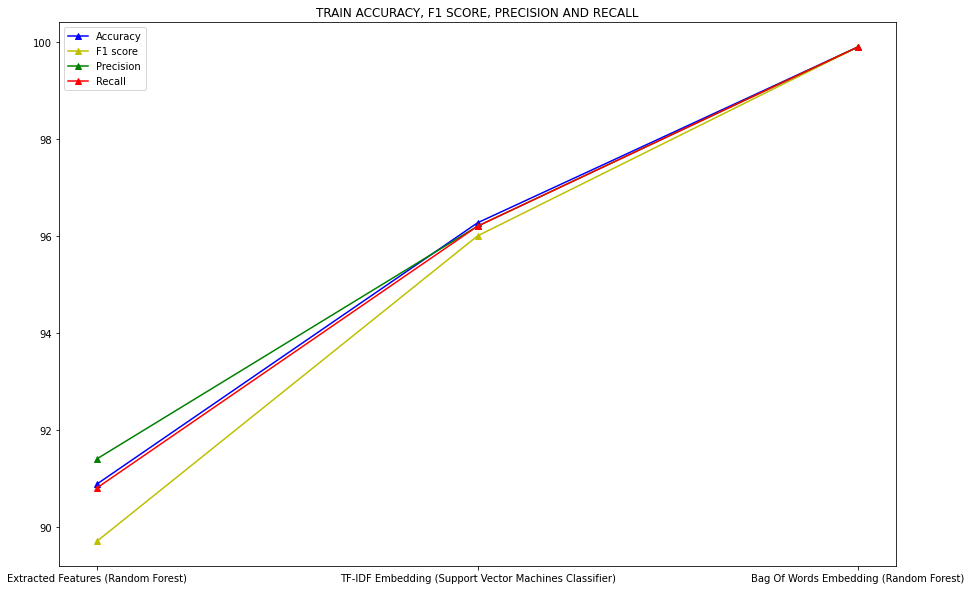

In [24]:
plt.figure(figsize = (15,10))
plt.title("TRAIN ACCURACY, F1 SCORE, PRECISION AND RECALL")
plt.plot(l,train_acc,  marker = "^", color = 'b', label = 'Accuracy')
plt.plot(l,train_f1, marker = "^", color = 'y', label = 'F1 score')
plt.plot(l,train_pre, marker = "^", color = 'g', label = 'Precision')
plt.plot(l,train_rec, marker = "^", color = 'r', label = 'Recall')
plt.legend()
plt.show()

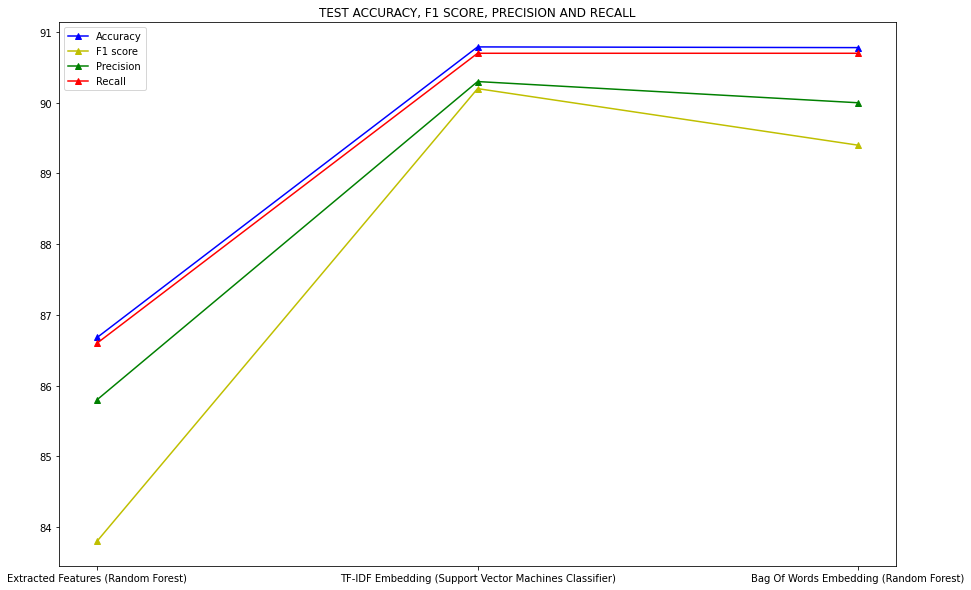

In [25]:
plt.figure(figsize = (15,10))
plt.title("TEST ACCURACY, F1 SCORE, PRECISION AND RECALL")
plt.plot(l,test_acc,  marker = "^", color = 'b', label = 'Accuracy')
plt.plot(l,test_f1, marker = "^", color = 'y', label = 'F1 score')
plt.plot(l,test_pre, marker = "^", color = 'g', label = 'Precision')
plt.plot(l,test_rec, marker = "^", color = 'r', label = 'Recall')
plt.legend()
plt.show()

In [6]:
l = [90.7,89.4,90.0,90.7,97.5,97.4,97.5,97.5]
types = ['a','a','a','a','b','b','b','b']
metrics = ['Accuracy','F1 Score','Precision','Recall','Accuracy','F1 Score','Precision','Recall']
df = pd.DataFrame([l,types,metrics]).T

In [7]:
df

,0,1,2
0,90.7,a,Accuracy
1,89.4,a,F1 Score
2,90.0,a,Precision
3,90.7,a,Recall
4,97.5,b,Accuracy
5,97.4,b,F1 Score
6,97.5,b,Precision
7,97.5,b,Recall


<AxesSubplot:xlabel='metrics'>

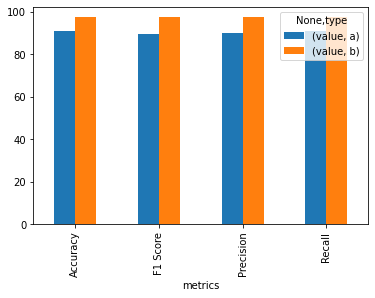

In [8]:
df.columns = ['value', 'type', 'metrics']
df.set_index(['metrics', 'type'], inplace=True)
df.unstack().plot.bar()

In [9]:
l = [90.7,89.4,90.0,90.7]
l1 = [97.5,97.4,97.5,97.5]
metrics = ['accuracy','F1 Score','Precision','Recall']

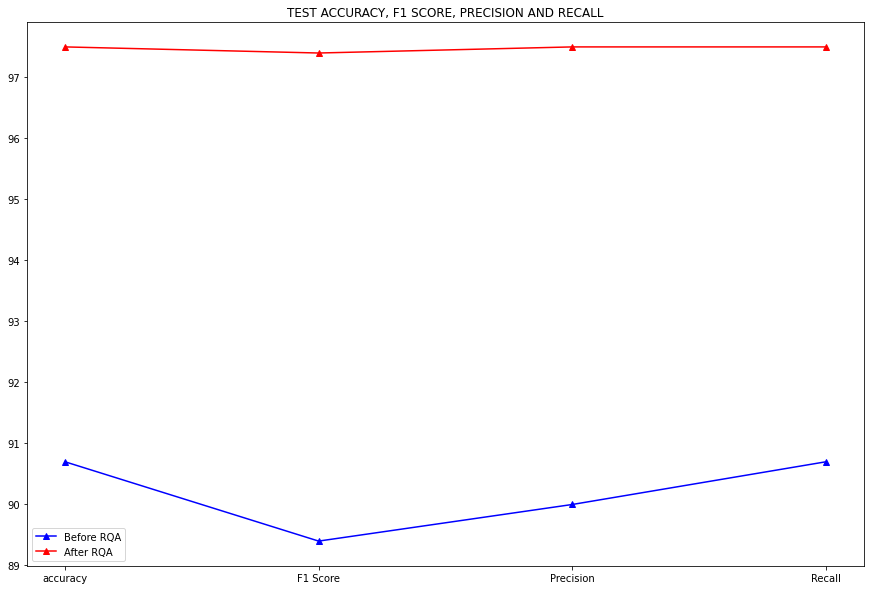

In [10]:
plt.figure(figsize = (15,10))
plt.title("TEST ACCURACY, F1 SCORE, PRECISION AND RECALL")
plt.plot(metrics,l,  marker = "^", color = 'b', label = 'Before RQA')
plt.plot(metrics,l1, marker = "^", color = 'r', label = 'After RQA')
plt.legend()
plt.show()